## 1/3 Optimal Single-Site surface metal combinations

Here, I'll mix all combinations of metal A and B to see what the resulting energies look like

#### Imports

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('../scripts')
from functions import *

In [11]:
metal_A, metal_B = "Pt", "Au"

dim_x, dim_y, dim_z = 200, 200, 3
SWR_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
SWR_surface = precompute_binding_energies_SPEED(SWR_surface, dim_x, dim_y, models)

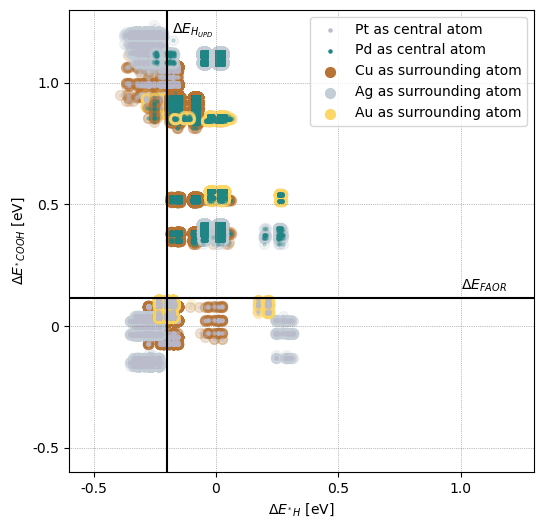

In [6]:
metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]


fig, ax = plt.subplots(figsize = (6, 6))

# Set the limits for both x and y axes
xmin, xmax, ymin, ymax = -0.6, 1.3, -0.6, 1.3
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Set the major ticks and tick labels
ax.set_xticks([-0.5, 0, 0.5, 1.0])
ax.set_xticklabels([-0.5, 0, 0.5, 1.0])
ax.set_yticks([-0.5, 0, 0.5, 1.0])
ax.set_yticklabels([-0.5, 0, 0.5, 1.0])

# Set the grid lines
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray')

#ax.set_title("Predicted energies for $^*COOH$ and $^*H$ for whole surface")
ax.set_xlabel("$\Delta E_{^*H}$ [eV]")
ax.set_ylabel("$\Delta E_{^*COOH}$ [eV]")

# Make lines at the correction constants
ax.axhline(y = -corrections["Bagger_COOH"], xmin = xmin, xmax = xmax, c = "black")
ax.axvline(x = -corrections["Bagger_H"], ymin = ymin, ymax = ymax, c = "black")

# And text for those correction lines
ax.text(x = -0.18, y =  1.2, s = "$\Delta E_{H_{UPD}}$")
ax.text(x =  1.0, y = 0.15, s = "$\Delta E_{FAOR}$")

## Do this outside of the loop
# Define the marker size
marker_size = 50

# Calculate the points of the custom marker (arranged horizontally)
x1 = np.linspace(-1, -0.5, 100)  # Left half-circle
y1 = np.sqrt(0.25 - (x1 + 0.75)**2)
x2 = np.linspace(0.5, 1, 100)  # Right half-circle
y2 = np.sqrt(0.25 - (x2 - 0.75)**2)

# Define the custom marker using np.row_stack() and np.column_stack()
xy1 = np.row_stack([[0, 0], np.column_stack([x1, y1])])
xy2 = np.row_stack([[0, 0], np.column_stack([x2, y2])])

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:

        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        SWR_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        SWR_surface = precompute_binding_energies_SPEED(SWR_surface, dim_x, dim_y, models)
        data_H    = SWR_surface["H_E"]
        data_COOH = SWR_surface["COOH_E"]

        # Markers
        c_A = metal_colors[metal_A]
        c_B = metal_colors[metal_B]
        ax.scatter(data_H, data_COOH, s=50, c = c_B, alpha = 0.2, marker="o")
        ax.scatter(data_H, data_COOH, s=5, c = c_A, alpha = 0.2, marker="o")

for metal_A in metals_A:
    c_A = metal_colors[metal_A]
    ax.scatter(2, 2, s=5, c = c_A, alpha = 1.0, marker="o", label = f"{metal_A} as central atom")
for metal_B in metals_B:
    c_B = metal_colors[metal_B]
    ax.scatter(2, 2, s=50, c = c_B, alpha = 1.0, marker="o", label = f"{metal_B} as surrounding atom")

ax.legend()

plt.savefig("../figures/Binding_Energy_Predictions/All_combs_SS_3.png", dpi = 600, bbox_inches = "tight")

### Same total fraction (1/3 A metal), but no special ordering

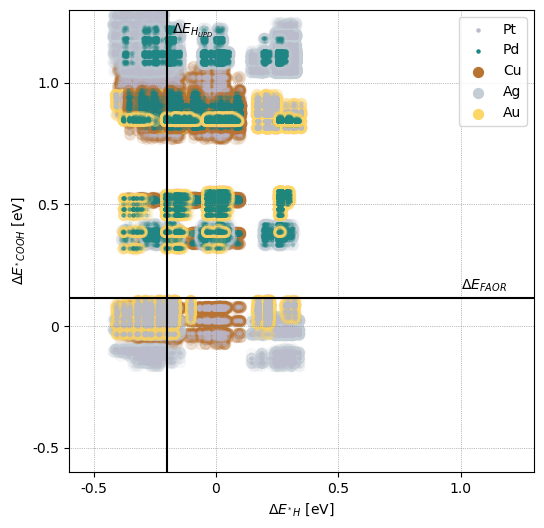

In [10]:
metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

fig, ax = plt.subplots(figsize = (6, 6))

# Set the limits for both x and y axes
xmin, xmax, ymin, ymax = -0.6, 1.3, -0.6, 1.3
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Set the major ticks and tick labels
ax.set_xticks([-0.5, 0, 0.5, 1.0])
ax.set_xticklabels([-0.5, 0, 0.5, 1.0])
ax.set_yticks([-0.5, 0, 0.5, 1.0])
ax.set_yticklabels([-0.5, 0, 0.5, 1.0])

# Set the grid lines
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray')

#ax.set_title("Predicted energies for $^*COOH$ and $^*H$ for whole surface")
ax.set_xlabel("$\Delta E_{^*H}$ [eV]")
ax.set_ylabel("$\Delta E_{^*COOH}$ [eV]")

# Make lines at the correction constants
ax.axhline(y = -corrections["Bagger_COOH"], xmin = xmin, xmax = xmax, c = "black")
ax.axvline(x = -corrections["Bagger_H"], ymin = ymin, ymax = ymax, c = "black")

# And text for those correction lines
ax.text(x = -0.18, y =  1.2, s = "$\Delta E_{H_{UPD}}$")
ax.text(x =  1.0, y = 0.15, s = "$\Delta E_{FAOR}$")

## Do this outside of the loop
# Define the marker size
marker_size = 50

# Calculate the points of the custom marker (arranged horizontally)
x1 = np.linspace(-1, -0.5, 100)  # Left half-circle
y1 = np.sqrt(0.25 - (x1 + 0.75)**2)
x2 = np.linspace(0.5, 1, 100)  # Right half-circle
y2 = np.sqrt(0.25 - (x2 - 0.75)**2)

# Define the custom marker using np.row_stack() and np.column_stack()
xy1 = np.row_stack([[0, 0], np.column_stack([x1, y1])])
xy2 = np.row_stack([[0, 0], np.column_stack([x2, y2])])

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:
        split = [0, 0, 0, 0, 0]
        if metal_A == "Pt":
            split[4] += 1/3
        if metal_A == "Pd":
            split[3] += 1/3
        if metal_B == "Ag":
            split[0] += 2/3
        if metal_B == "Au":
            split[1] += 2/3
        if metal_B == "Cu":
            split[2] += 2/3

        # Initialize the bimetal surface
        BM_surface = initialize_surface(dim_x, dim_y, metals, split)

        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        #BM_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        BM_surface = precompute_binding_energies_SPEED(BM_surface, dim_x, dim_y, models)
        data_H    = BM_surface["H_E"]
        data_COOH = BM_surface["COOH_E"]

        # Markers
        c_A = metal_colors[metal_A]
        c_B = metal_colors[metal_B]
        ax.scatter(data_H, data_COOH, s=50, c = c_B, alpha = 0.1, marker="o")
        ax.scatter(data_H, data_COOH, s=5, c = c_A, alpha = 0.1, marker="o")

for metal_A in metals_A:
    c_A = metal_colors[metal_A]
    ax.scatter(2, 2, s=5, c = c_A, alpha = 1.0, marker="o", label = f"{metal_A}")
for metal_B in metals_B:
    c_B = metal_colors[metal_B]
    ax.scatter(2, 2, s=50, c = c_B, alpha = 1.0, marker="o", label = f"{metal_B}")

ax.legend()

plt.savefig("../figures/Binding_Energy_Predictions/Bimetal_combs_1_7.png", dpi = 600, bbox_inches = "tight")